In [33]:
import numpy as np
import matplotlib.pyplot as plt


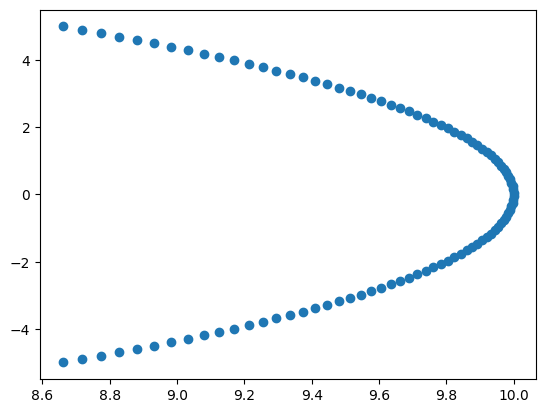

In [34]:
# create dataset
x = np.linspace(-5.0,5.0,100)
y = np.sqrt(10**2 - x**2)
plt.scatter(y,x)

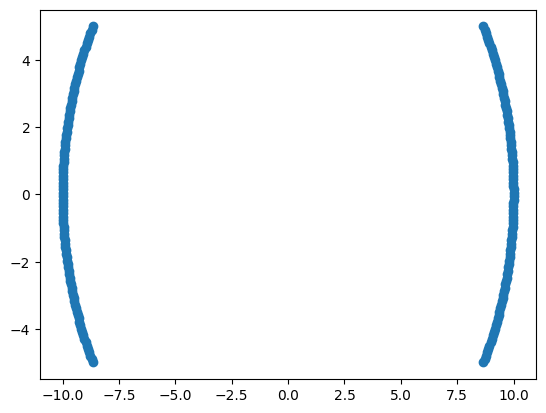

In [35]:
# to create  the horizental stack (1D) 
y = np.hstack([y,-y])
x = np.hstack([x,-x])
plt.scatter(y,x)

In [5]:
print(y)
print(x)

[ 8.66025404  8.71779204  8.77378994  8.82827705  8.88128118  8.93282873
  8.98294476  9.03165312  9.07897646  9.12493632  9.16955321  9.21284664
  9.25483518  9.29553652  9.3349675   9.37314414  9.41008171  9.44579475
  9.4802971   9.51360192  9.54572176  9.57666854  9.60645359  9.63508769
  9.66258107  9.68894344  9.714184    9.73831149  9.76133416  9.7832598
  9.80409577  9.82384901  9.84252604  9.86013297  9.87667553  9.89215905
  9.90658851  9.91996849  9.93230325  9.94359667  9.9538523   9.96307334
  9.97126266  9.9784228   9.98455598  9.98966408  9.99374868  9.99681104
  9.99885209  9.99987246  9.99987246  9.99885209  9.99681104  9.99374868
  9.98966408  9.98455598  9.9784228   9.97126266  9.96307334  9.9538523
  9.94359667  9.93230325  9.91996849  9.90658851  9.89215905  9.87667553
  9.86013297  9.84252604  9.82384901  9.80409577  9.7832598   9.76133416
  9.73831149  9.714184    9.68894344  9.66258107  9.63508769  9.60645359
  9.57666854  9.54572176  9.51360192  9.4802971   9.4

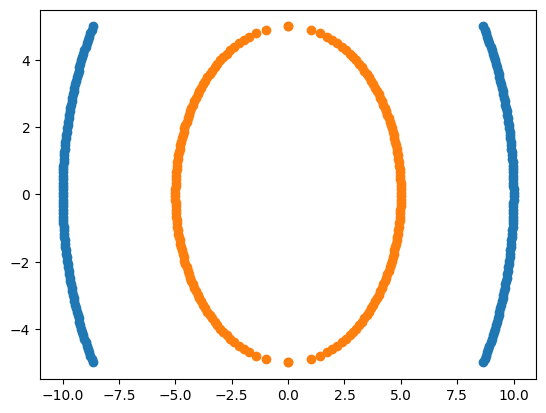

In [36]:
##create another data set
x1 = np.linspace(-5.0,5.0,100)
y1= np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1, -y1])
x1 = np.hstack([x1,-x1])
plt.scatter(y,x)
plt.scatter(y1,x1)

In [37]:
import pandas as pd
df1 = pd.DataFrame(np.vstack([y,x]).T, columns = ['X1', 'X2'])
df1['Y'] = 0 
df2 = pd.DataFrame(np.vstack([y1,x1]).T, columns = ['X1', 'X2'])
df2['Y'] = 1


In [38]:
## Dataset ready
df = pd.concat([df1, df2], ignore_index=True)
df.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [39]:
# Independent and dependent features
X = df.iloc[:,:2]
Y = df.Y

In [40]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=0)

In [16]:
Y_train

250    1
63     0
312    1
159    0
283    1
      ..
323    1
192    0
117    0
47     0
172    0
Name: Y, Length: 300, dtype: int64

In [17]:
#SVC with linear Kernel
from sklearn.svm import SVC
classfier = SVC(kernel='linear', random_state=0)
classfier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

In [18]:
Y_Pred = classfier.predict(X_test)


In [21]:
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_test,Y_Pred)
accuracy

0.45

In [23]:
df['X1_square'] = df['X1']**2
df['X2_square'] = df['X2']**2
df['X1X2'] = df['X1']* df['X2']

In [25]:
X = df[['X1', 'X2', 'X1_square','X2_square','X1X2']]
Y = df.Y

In [27]:
X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=0)
X_train

,X1,X2,X1_square,X2_square,X1X2
250,4.999745,0.050505,24.997449,0.002551,0.252512
63,9.906589,1.363636,98.140496,1.859504,13.508984
312,-3.263736,3.787879,10.651974,14.348026,-12.362637
159,-9.953852,-0.959596,99.079176,0.920824,9.551676
283,3.680983,3.383838,13.549638,11.450362,12.455852
...,...,...,...,...,...
323,-4.223140,2.676768,17.834915,7.165085,-11.304366
192,-9.031653,-4.292929,81.570758,18.429242,38.772248
117,-9.445795,3.282828,89.223038,10.776962,-31.008922
47,9.996811,-0.252525,99.936231,0.063769,-2.524447


In [29]:
import plotly. express as px
fig = px.scatter_3d(df, x= 'X1', y = 'X2', z = 'X1X2', color='Y')
fig.show()

## Figure show 3d graph but not classified properly

In [30]:
## manual Polynomial
classfier = SVC(kernel='linear', random_state=0)
classfier.fit(X_train, Y_train)
Y_Pred = classfier.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, Y_Pred)
accuracy

1.0

In [32]:
## Now implement polynomial formula on data set X(transpose).X + D
import plotly.express as px
fig = px.scatter_3d(df, x= 'X1_square', y='X2_square', z= 'X1X2', color = 'Y')
fig.show()

In [41]:
## Calculate automatic Polynomial  with accuracy
classfier = SVC(kernel='poly')
classfier.fit(X_train, Y_train)
Y_Pred = classfier.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, Y_Pred)
accuracy

0.59